In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv')
test_df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')

In [3]:
train_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [4]:
 test_df.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [5]:
# 1. Shape of datasets
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# 2. Missing values (Top 10)
print("\nTop 10 missing in train:")
print(train_df.isnull().sum().sort_values(ascending=False).head(10))

print("\nTop 10 missing in test:")
print(test_df.isnull().sum().sort_values(ascending=False).head(10))

# 3. Class distribution
print("\nClass distribution:")
print(train_df['class'].value_counts())

Train shape: (8000, 30)
Test shape: (2845, 29)

Top 10 missing in train:
20140423_N    1760
20140626_N    1600
20140218_N    1440
20141016_N    1440
20150226_N    1360
20141117_N    1280
20140117_N    1200
20150602_N    1200
20140322_N    1120
20150330_N    1120
dtype: int64

Top 10 missing in test:
Unnamed: 0    0
20141016_N    0
20140117_N    0
20140202_N    0
20140218_N    0
20140322_N    0
20140407_N    0
20140423_N    0
20140509_N    0
20140525_N    0
dtype: int64

Class distribution:
class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [7]:
ndvi_cols = [col for col in train_df.columns if col.endswith('_N')]

# Interpolate missing NDVI values (axis=1 means across time)
train_df[ndvi_cols] = train_df[ndvi_cols].interpolate(axis=1, limit_direction='both')

In [8]:
# Create NDVI statistical features
train_df['ndvi_mean'] = train_df[ndvi_cols].mean(axis=1)
train_df['ndvi_std'] = train_df[ndvi_cols].std(axis=1)
train_df['ndvi_min'] = train_df[ndvi_cols].min(axis=1)
train_df['ndvi_max'] = train_df[ndvi_cols].max(axis=1)
train_df['ndvi_skew'] = train_df[ndvi_cols].skew(axis=1)

test_df['ndvi_mean'] = test_df[ndvi_cols].mean(axis=1)
test_df['ndvi_std'] = test_df[ndvi_cols].std(axis=1)
test_df['ndvi_min'] = test_df[ndvi_cols].min(axis=1)
test_df['ndvi_max'] = test_df[ndvi_cols].max(axis=1)
test_df['ndvi_skew'] = test_df[ndvi_cols].skew(axis=1)

In [9]:
# All features for modeling
features = ndvi_cols + ['ndvi_mean', 'ndvi_std', 'ndvi_min', 'ndvi_max', 'ndvi_skew']

X = train_df[features]
X_test = test_df[features]

# Encode target
le = LabelEncoder()
y = le.fit_transform(train_df['class'])

In [10]:
# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

# Validate
y_val_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"\n✅ Validation Accuracy: {val_acc:.4f}")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))


✅ Validation Accuracy: 0.9038
              precision    recall  f1-score   support

        farm       0.72      0.55      0.63       168
      forest       0.93      0.98      0.95      1232
       grass       0.84      0.54      0.66        39
  impervious       0.83      0.85      0.84       134
     orchard       1.00      0.17      0.29         6
       water       0.81      0.62      0.70        21

    accuracy                           0.90      1600
   macro avg       0.86      0.62      0.68      1600
weighted avg       0.90      0.90      0.90      1600



In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs'],
    'max_iter': [3000],
    'multi_class': ['multinomial']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print(f"✅ Best Parameters: {grid.best_params_}")
print(f"✅ Best CV Score: {grid.best_score_:.4f}")

✅ Best Parameters: {'C': 1, 'max_iter': 3000, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
✅ Best CV Score: 0.9164


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_val)
print("\n🎯 Random Forest:")
print(classification_report(y_val, rf_preds, target_names=le.classes_))


🎯 Random Forest:
              precision    recall  f1-score   support

        farm       0.86      0.70      0.77       168
      forest       0.94      0.99      0.97      1232
       grass       0.89      0.44      0.59        39
  impervious       0.85      0.84      0.84       134
     orchard       0.00      0.00      0.00         6
       water       0.94      0.71      0.81        21

    accuracy                           0.93      1600
   macro avg       0.75      0.61      0.66      1600
weighted avg       0.92      0.93      0.92      1600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_val)
print("\n🔥 XGBoost:")
print(classification_report(y_val, xgb_preds, target_names=le.classes_))


🔥 XGBoost:
              precision    recall  f1-score   support

        farm       0.88      0.80      0.84       168
      forest       0.97      0.99      0.98      1232
       grass       0.96      0.64      0.77        39
  impervious       0.84      0.89      0.87       134
     orchard       1.00      0.17      0.29         6
       water       0.89      0.76      0.82        21

    accuracy                           0.95      1600
   macro avg       0.92      0.71      0.76      1600
weighted avg       0.95      0.95      0.94      1600



In [14]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))
print(class_weights)


{0: 1.58494304110946, 1: 0.21649414789256477, 2: 6.794055201698514, 3: 1.9937694704049844, 4: 44.44444444444444, 5: 12.698412698412698}


In [15]:
xgb_model = XGBClassifier(
    
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)


In [16]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=3000, solver='lbfgs', multi_class='multinomial')),
    ('rf', RandomForestClassifier(n_estimators=300, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
], voting='soft')

voting.fit(X_train, y_train)
final_preds = voting.predict(X_test_scaled)

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
X_test_poly = poly.transform(X_test_scaled)


Train sizes: [ 640 2080 3520 4960 6400]
Train scores shape: (5, 5)
Validation scores shape: (5, 5)


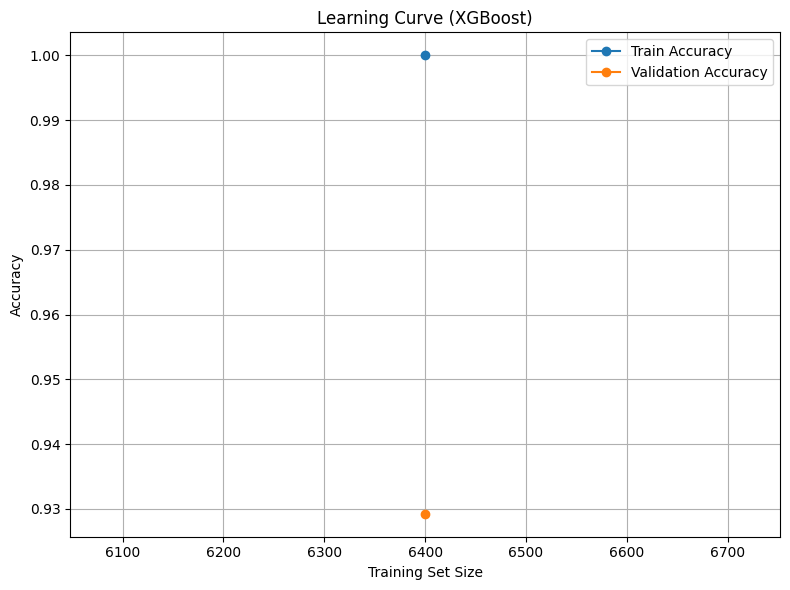

In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    xgb_model, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1
)


print("Train sizes:", train_sizes)
print("Train scores shape:", train_scores.shape)
print("Validation scores shape:", val_scores.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Accuracy', marker='o')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Accuracy', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (XGBoost)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


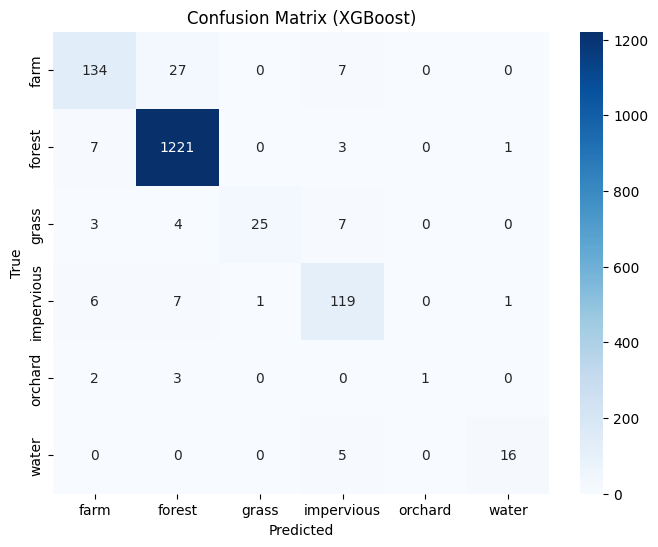

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, xgb_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring='accuracy')
print(f"📊 Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

📊 Cross-Validation Accuracy: 0.9293 ± 0.0186


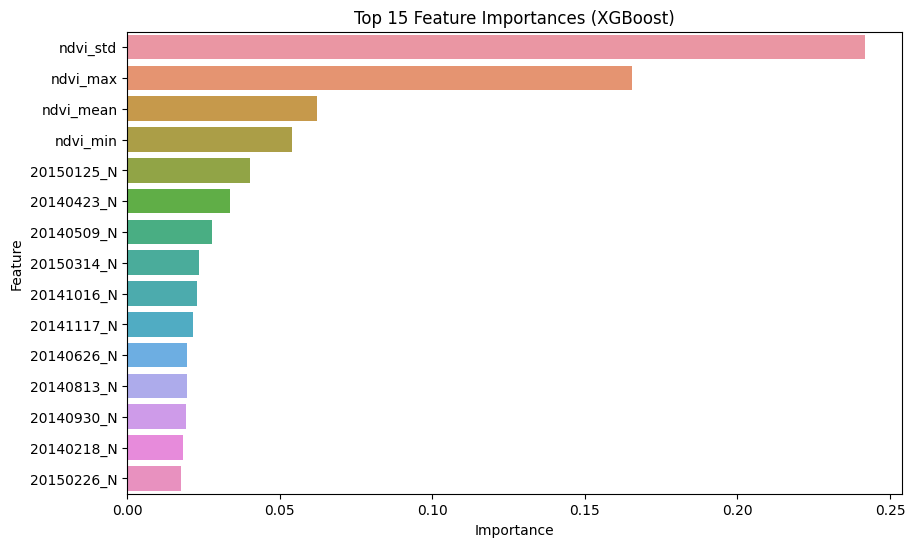

In [21]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)


xgb_model.fit(X_train, y_train)
importances = xgb_model.feature_importances_
sorted_idx = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_idx], y=np.array(features)[sorted_idx])
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

<Figure size 1400x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


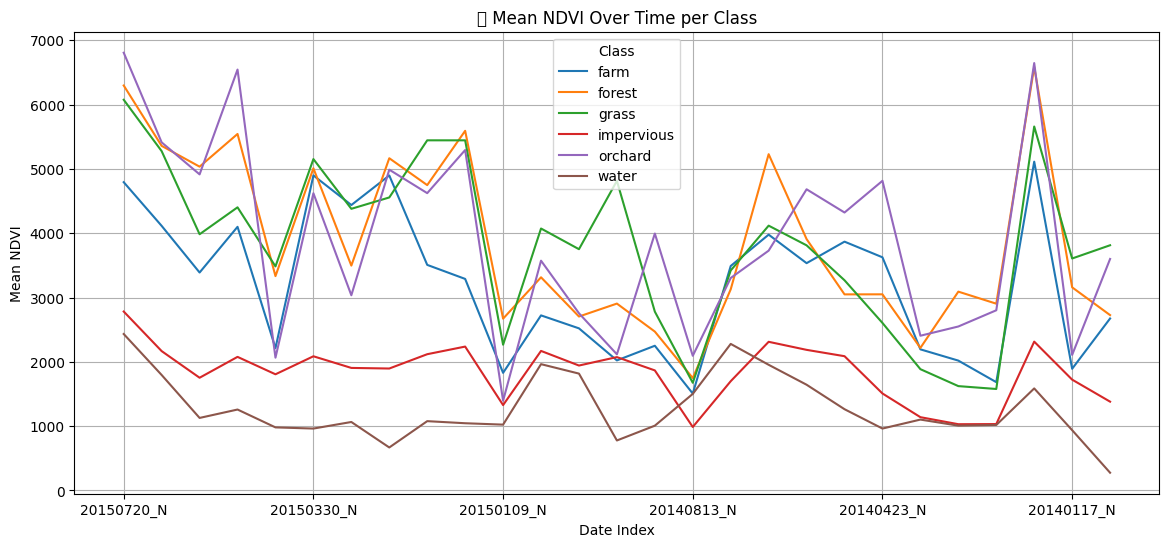

In [22]:
ndvi_mean_by_class = train_df.groupby('class')[ndvi_cols].mean().T

plt.figure(figsize=(14,6))
ndvi_mean_by_class.plot(figsize=(14,6))
plt.title('📈 Mean NDVI Over Time per Class')
plt.ylabel('Mean NDVI')
plt.xlabel('Date Index')
plt.legend(title='Class')
plt.grid(True)
plt.show()

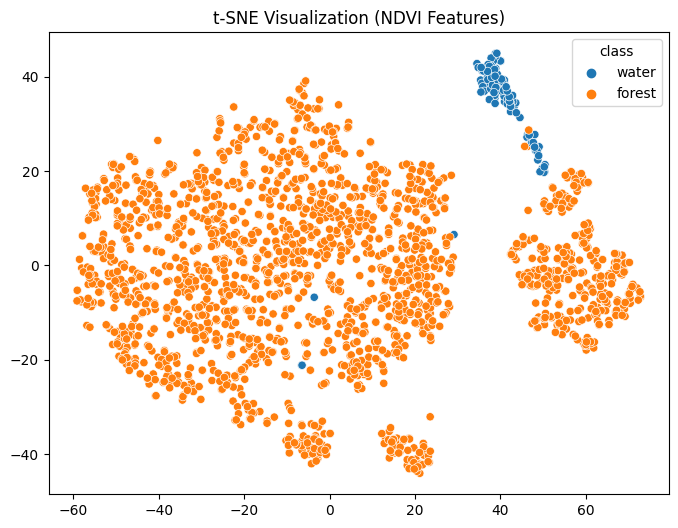

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X_scaled[:2000])  # sample for speed

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=train_df['class'][:2000], palette='tab10')
plt.title("t-SNE Visualization (NDVI Features)")
plt.show()

In [24]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('lr', model),
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')

ensemble.fit(X_train, y_train)
ensemble_preds = ensemble.predict(X_val)


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(train_df['class'])


In [26]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, X_scaled, y_encoded, cv=cv, scoring='accuracy')
print(f"Cross-Validation Score: {scores.mean():.4f}")


Cross-Validation Score: 0.9515


In [27]:
train_df['ndvi_slope'] = train_df[ndvi_cols[-1]] - train_df[ndvi_cols[0]]
test_df['ndvi_slope'] = test_df[ndvi_cols[-1]] - test_df[ndvi_cols[0]]


In [28]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
}

search = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1)
search.fit(X_train, y_train)
print(search.best_params_)


{'subsample': 0.7, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}


100%|===================| 38368/38400 [12:55<00:00]       

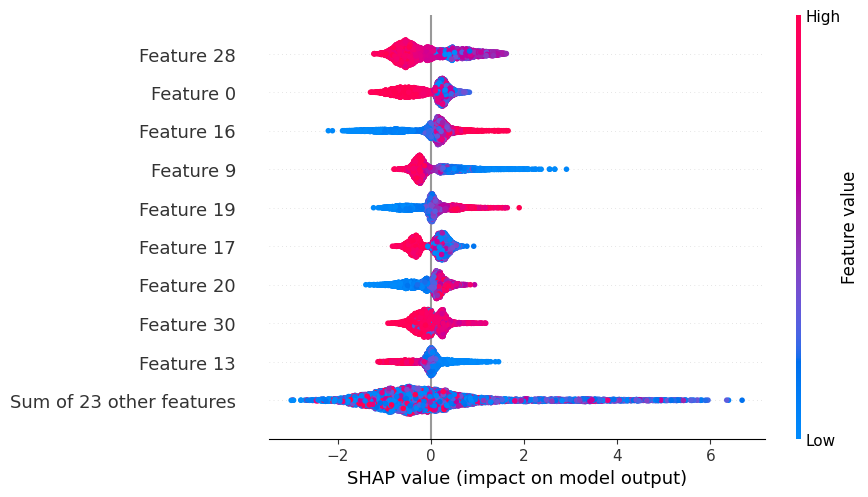

In [29]:
import shap
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

# Plot for a single class (e.g., class 0)
shap.plots.beeswarm(shap_values[:, :, 0])


In [30]:
train_df['ndvi_std'] = train_df[ndvi_cols].std(axis=1)
train_df['ndvi_max_diff'] = train_df[ndvi_cols].max(axis=1) - train_df[ndvi_cols].min(axis=1)
test_df['ndvi_std'] = test_df[ndvi_cols].std(axis=1)
test_df['ndvi_max_diff'] = test_df[ndvi_cols].max(axis=1) - test_df[ndvi_cols].min(axis=1)


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)


In [32]:
import joblib
joblib.dump(xgb_model, 'best_xgb_model.pkl')


['best_xgb_model.pkl']

In [33]:
final_preds = xgb_model.predict(X_test_scaled)
final_labels = le.inverse_transform(final_preds)

submission = pd.DataFrame({
    'ID': test_df['ID'],
    'class': final_labels
})
submission.to_csv('submission.csv', index=False)
print("📁 Submission file created: submission.csv")

📁 Submission file created: submission.csv
